In [6]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt

import pickle

Populating the interactive namespace from numpy and matplotlib


### Variables
- **GameID**: Unique ID for each game (integer)
- **LeagueIndex**: 1-8 for Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, Professional League (ordinal)
- **Age**: Age of each player (integer)
- **HoursPerWeek**: Hours spent playing per week (integer)
- **TotalHours**: Total hours spent playing (integer)
- **APM**: Action per minute (continuous)
- **SelectByHotkeys**: Number of unit selections made using hotkeys per timestamp (continuous)
- **AssignToHotkeys**: Number of units assigned to hotkeys per timestamp (continuous)
- **UniqueHotkeys**: Number of unique hotkeys used per timestamp (continuous)
- **MinimapAttacks**: Number of attack actions on minimap per timestamp (continuous)
- **MinimapRightClicks**: Number of right-clicks on minimap per timestamp (continuous)
- **NumberOfPACs**: Number of PACs per timestamp (continuous)
- **GapBetweenPACs**: Mean duration (milliseconds) between PACs (continuous)
- **ActionLatency**: Mean latency (milliseconds) from the onset of PACs to their first action (continuous)
- **ActionsInPAC**: Mean number of actions within each PAC (continuous)
- **TotalMapExplored**: Number of 24x24 game coordinate grids viewed by player per timestamp (continuous)
- **WorkersMade**: Number of SCVs, drones, probes trained per timestamp (continuous)
- **UniqueUnitsMade**: Unique units made per timestamp (continuous)
- **ComplexUnitsMade**: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
- **ComplexAbilityUsed**: Abilities requiring specific targeting instructions used per timestamp (continuous)
- **MaxTimeStamp**: Time stamp of game's last recorded event (integer)

### Notes
- Currently there are 7 StarCraft 2 leagues, and the 8th is the "Pro" League. 
- Breakdowns of league composition as a percentage of the player base and other details are here:
    - https://liquipedia.net/starcraft2/Battle.net_Leagues

In [7]:
sc = pd.read_csv('../data/starcraft.csv')

In [8]:
sc.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


In [9]:
# Get info
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   float64
 6   SelectByHotkeys     3395 non-null   float64
 7   AssignToHotkeys     3395 non-null   float64
 8   UniqueHotkeys       3395 non-null   float64
 9   MinimapAttacks      3395 non-null   float64
 10  MinimapRightClicks  3395 non-null   float64
 11  NumberOfPACs        3395 non-null   float64
 12  GapBetweenPACs      3395 non-null   float64
 13  ActionLatency       3395 non-null   float64
 14  ActionsInPAC        3395 non-null   float64
 15  TotalMapExplored    3395 non-null   float64
 16  Worker

## Remove Duplicate Players
- According to the supplementary info the researchers  discovered that a few individuals might have been able to submit multiple games to the study. In order to ensure independence of  observations, their consequent work drops the following games:
[1172,2183,2652,4064,4075,5247,7011,7988,8236,8750]

In [10]:
# Drop rows containing those GameIDs
scc = sc.loc[~sc['GameID'].isin([1172,2183,2652,4064,4075,5247,7011,7988,8236,8750])]

In [11]:
scc.loc[sc['GameID'].isin([1172,2183,2652,4064,4075,5247,7011,7988,8236,8750])]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp


- All gone.

### Remove GameID

In [12]:
# We don't need the GameID column any longer, so let's drop that too.
scc = scc.drop(['GameID'], axis=1)

## Remove crazy total hour values

- There are some crazy outlier values for total hours played.

In [13]:
scc.describe()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3385.000000,3330.000000,3329.000000,3328.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000,3385.000000
mean,4.180798,21.648348,15.897266,960.122596,116.966144,0.004294,0.000373,0.000059,0.000098,0.000388,0.003462,40.392912,63.761769,5.270470,0.000282,0.001032,0.000085,0.000059,0.000142,83532.935894
std,1.517369,4.210560,11.970126,17344.126882,51.954923,0.005288,0.000224,0.000038,0.000165,0.000377,0.000993,17.165144,19.255581,1.494656,0.000086,0.000519,0.000025,0.000111,0.000265,33466.683854
min,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,3.000000,19.000000,8.000000,300.000000,79.695600,0.001257,0.000204,0.000033,0.000000,0.000140,0.002751,28.969700,50.454200,4.271500,0.000224,0.000683,0.000068,0.000000,0.000000,60028.000000
50%,4.000000,21.000000,12.000000,500.000000,108.002400,0.002496,0.000353,0.000053,0.000040,0.000282,0.003395,36.804600,60.938900,5.093500,0.000270,0.000906,0.000082,0.000000,0.000020,80932.000000
75%,5.000000,24.000000,20.000000,800.000000,142.651800,0.005112,0.000499,0.000079,0.000118,0.000514,0.004026,48.299100,73.722400,6.029800,0.000325,0.001259,0.000099,0.000085,0.000181,101984.000000
max,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,0.000338,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


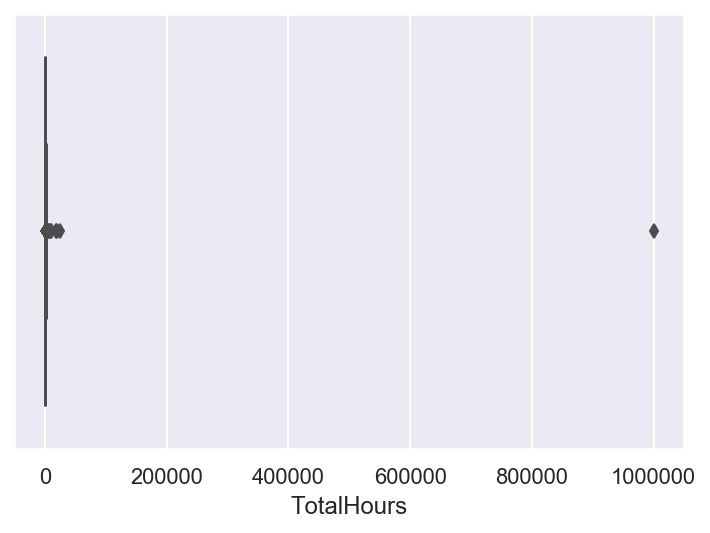

In [14]:
# Let's look at a boxplot of the values
sns.boxplot(scc['TotalHours'])

- Let's zero in on the outlier values by looking at values that are the traditional definition of outlier: 1.5 IQRs below the 1st Quartile or above the 3rd Quartile. 

In [15]:
TH_IQR = scc.describe().loc['75%', 'TotalHours'] - scc.describe().loc['25%', 'TotalHours']
TH_Outlier = (TH_IQR * 1.5) + 800.0
TH_Outlier

1550.0

- Note that we are only looking at high outliers since low outliers are numerically impossible: 300 - 750 = -450

In [16]:
scc.loc[sc['TotalHours'] > TH_Outlier].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         168 non-null    int64  
 1   Age                 168 non-null    float64
 2   HoursPerWeek        168 non-null    float64
 3   TotalHours          168 non-null    float64
 4   APM                 168 non-null    float64
 5   SelectByHotkeys     168 non-null    float64
 6   AssignToHotkeys     168 non-null    float64
 7   UniqueHotkeys       168 non-null    float64
 8   MinimapAttacks      168 non-null    float64
 9   MinimapRightClicks  168 non-null    float64
 10  NumberOfPACs        168 non-null    float64
 11  GapBetweenPACs      168 non-null    float64
 12  ActionLatency       168 non-null    float64
 13  ActionsInPAC        168 non-null    float64
 14  TotalMapExplored    168 non-null    float64
 15  WorkersMade         168 non-null    float64
 16  UniqueU

- This is a big portion of the dataset. Let's take care of the absurd outlier and see where that leaves us on a box plot.

In [17]:
# Drop egregious outlier
scc.drop(scc.loc[scc.loc[:, 'TotalHours'] == 1000000.0].index, inplace=True)

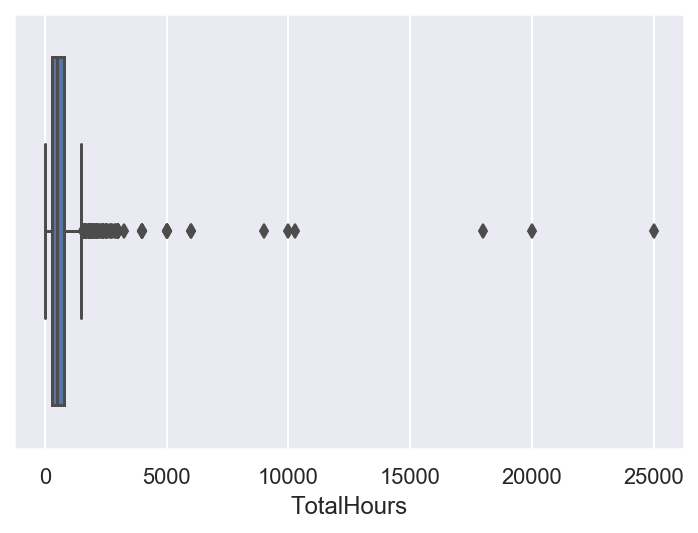

In [18]:
sns.boxplot(scc['TotalHours'])

- Closing in... Let's look at how many are over the outlier range x2

In [19]:
outliers = scc.loc[sc['TotalHours'] > TH_Outlier] # Normal outlier

outliers2IQR = scc.loc[sc['TotalHours'] > TH_Outlier * 2] # 2x IQR outlier

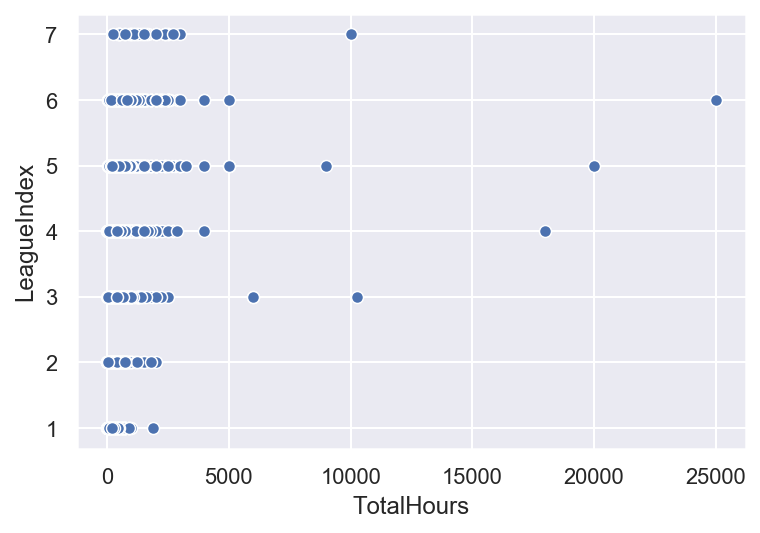

In [20]:
# Let's look at the league distribution of these outliers in a scatterplot.
sns.scatterplot(x = 'TotalHours', y = 'LeagueIndex', data=scc)

- There appears to be some correlation between more hours and higher ranking.
- The more skewed outliers seem to appear around 5000 hours, so let's see what that cutoff looks like. 

In [21]:
scc.loc[sc['TotalHours'] >= 5000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 3253
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LeagueIndex         12 non-null     int64  
 1   Age                 12 non-null     float64
 2   HoursPerWeek        12 non-null     float64
 3   TotalHours          12 non-null     float64
 4   APM                 12 non-null     float64
 5   SelectByHotkeys     12 non-null     float64
 6   AssignToHotkeys     12 non-null     float64
 7   UniqueHotkeys       12 non-null     float64
 8   MinimapAttacks      12 non-null     float64
 9   MinimapRightClicks  12 non-null     float64
 10  NumberOfPACs        12 non-null     float64
 11  GapBetweenPACs      12 non-null     float64
 12  ActionLatency       12 non-null     float64
 13  ActionsInPAC        12 non-null     float64
 14  TotalMapExplored    12 non-null     float64
 15  WorkersMade         12 non-null     float64
 16  UniqueUn

__Distribution of 1.5\*IQR Outliers__

In [22]:
outliers.LeagueIndex.value_counts().sort_index()

1     1
2     2
3     8
4    25
5    48
6    71
7    12
Name: LeagueIndex, dtype: int64

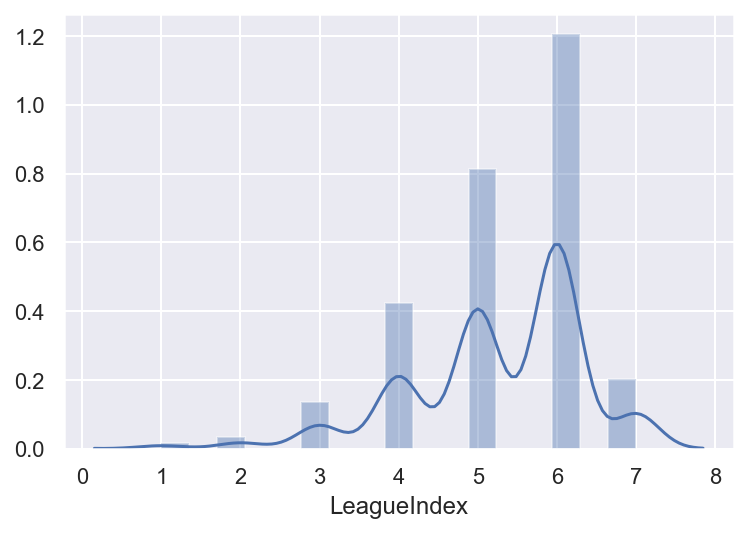

In [23]:
sns.distplot(outliers.LeagueIndex)

__Distribution of 3\*IQR Outliers__

In [24]:
outliers2IQR.LeagueIndex.value_counts().sort_index()

3    3
4    2
5    7
6    4
7    1
Name: LeagueIndex, dtype: int64

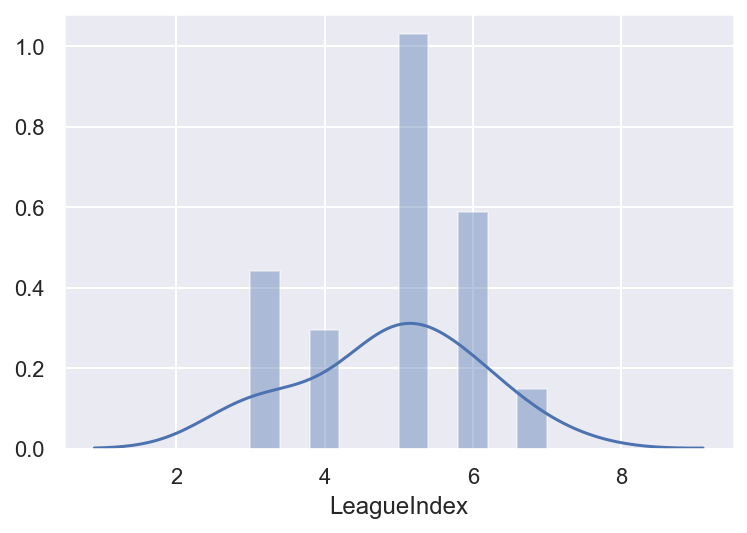

In [25]:
sns.distplot(outliers2IQR.LeagueIndex, bins=10)

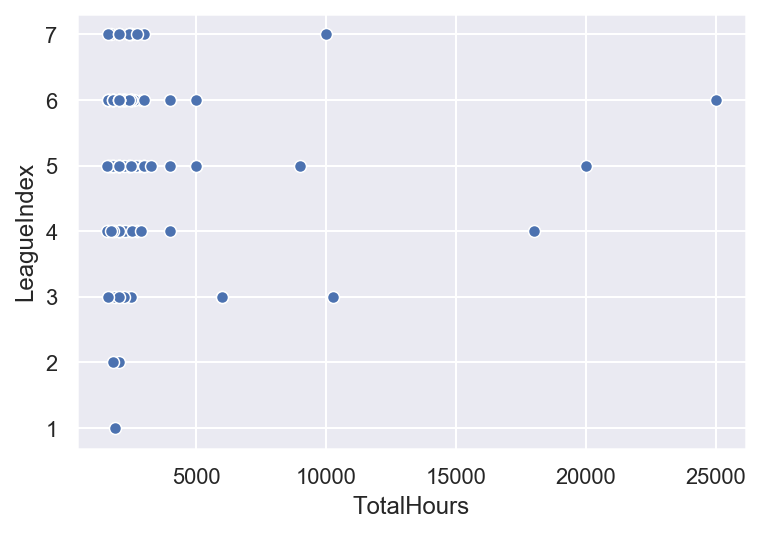

In [26]:
sns.scatterplot(x='TotalHours',
                y='LeagueIndex',
                data=outliers)

__Distribution of Non-Outlier Data__
- For comparison we'll look at the distribution of non-outlier data as well. 

In [27]:
non_outliers = scc.loc[scc['TotalHours'] < TH_Outlier]

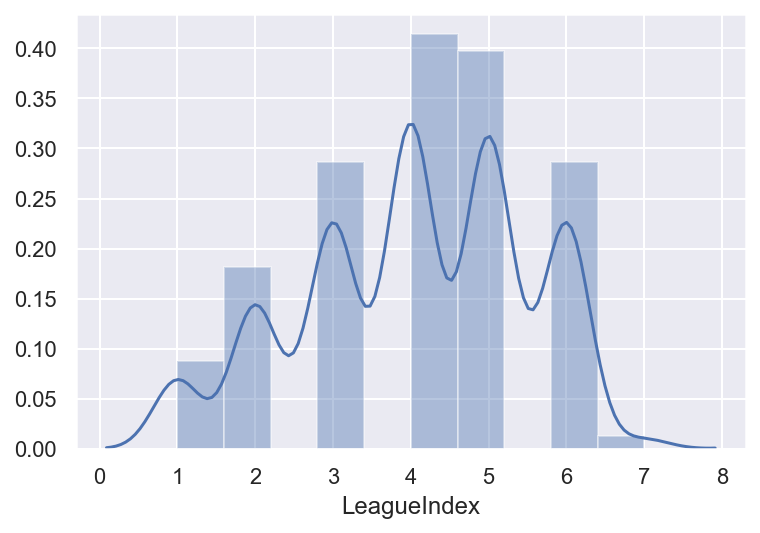

In [28]:
sns.distplot(non_outliers.LeagueIndex, bins=10)

In [29]:
non_outliers = scc.loc[scc['TotalHours'] < TH_Outlier]

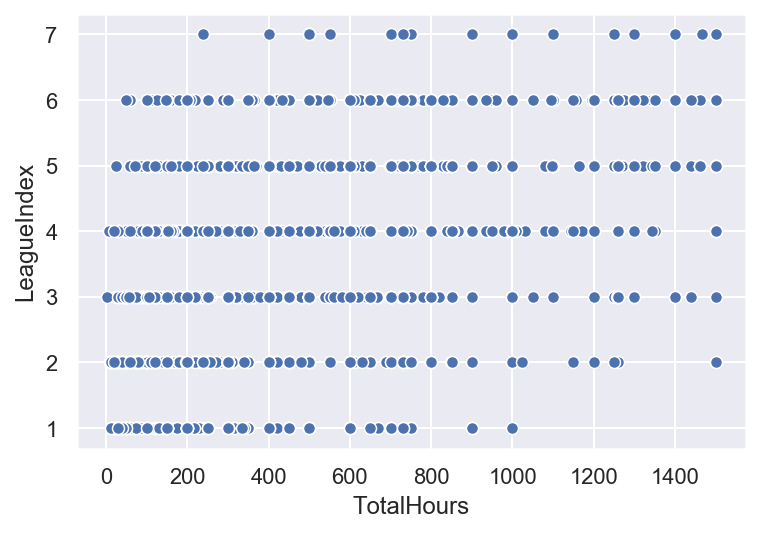

In [30]:
sns.scatterplot(x='TotalHours',
                y='LeagueIndex',
                data=non_outliers)

__Plot Comparison__
- Let's look at all of the plots together and compare

In [31]:
outliers2IQR.head()

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
1,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.000000,0.000208,57812
7,7,17.0,42.0,10000.0,212.6022,0.009040,0.000676,0.000060,0.001164,0.001253,0.004952,24.6117,41.7671,6.6104,0.000448,0.002277,0.000090,0.000129,0.000249,100556
10,3,16.0,16.0,6000.0,153.8010,0.001677,0.000319,0.000067,0.000000,0.000822,0.003772,23.4107,48.0711,7.0044,0.000402,0.001593,0.000117,0.000000,0.000017,59644
14,5,16.0,30.0,5000.0,160.4754,0.004254,0.000432,0.000025,0.000775,0.000406,0.004571,36.2897,46.8889,5.4361,0.000356,0.001981,0.000089,0.000000,0.000000,78752
289,4,19.0,28.0,4000.0,194.1858,0.011964,0.000503,0.000047,0.000246,0.000328,0.004952,39.8389,41.0591,4.6454,0.000258,0.000925,0.000070,0.000351,0.000140,85424


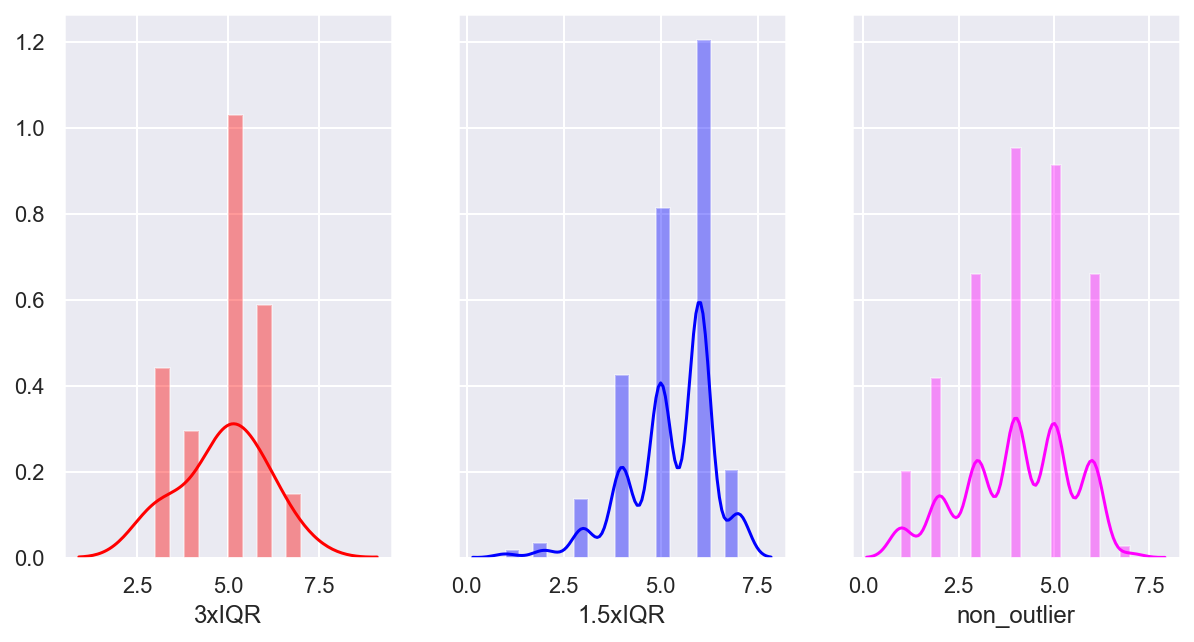

In [32]:
f, axes = plt.subplots(1,3, sharey=True, figsize=(10,5))
sns.distplot(outliers2IQR.LeagueIndex, ax=axes[0], color='red', axlabel='3xIQR', bins=10)
sns.distplot(outliers.LeagueIndex, ax=axes[1], color='blue', axlabel='1.5xIQR')
sns.distplot(non_outliers.LeagueIndex, ax=axes[2], color='magenta', axlabel='non_outlier')

- Normal outliers definitely center around a higher LeagueIndex
- Center of the distributions of the outliers and the rest are about the same, but the spread is different. However, it doesn't seem different enough to warrant keeping them. 
- Removing the 17 outliers for 3xIQR.

In [33]:
# Dropping 17 outlier rows
scc = scc.drop(scc[scc.TotalHours >= TH_Outlier * 2].index)

## Handling NaNs

- Several nulls as we can see the difference between Age, HoursPerWeek, and TotalHours vs the other attributes. 

In [34]:
# Sum up the number of NaNs
scc.isna().sum()

LeagueIndex            0
Age                   55
HoursPerWeek          56
TotalHours            57
APM                    0
SelectByHotkeys        0
AssignToHotkeys        0
UniqueHotkeys          0
MinimapAttacks         0
MinimapRightClicks     0
NumberOfPACs           0
GapBetweenPACs         0
ActionLatency          0
ActionsInPAC           0
TotalMapExplored       0
WorkersMade            0
UniqueUnitsMade        0
ComplexUnitsMade       0
ComplexAbilityUsed     0
MaxTimeStamp           0
dtype: int64

- Ok similar numbers of NaNs for the three attributes. Let's look at these three attributes in detail.
- Create a df of only the null rows and one without the null rows. 

In [35]:
# Create df made up of only those rows that have nulls and compare to full df
scc_null = scc[scc.isnull().any(axis=1)]

In [36]:
# Create df without the null values
scc_nonull = scc[~scc.isnull().any(axis=1)]

- Let's look at the distribution of LeagueIndex vs Age.

### Player Age NaNs

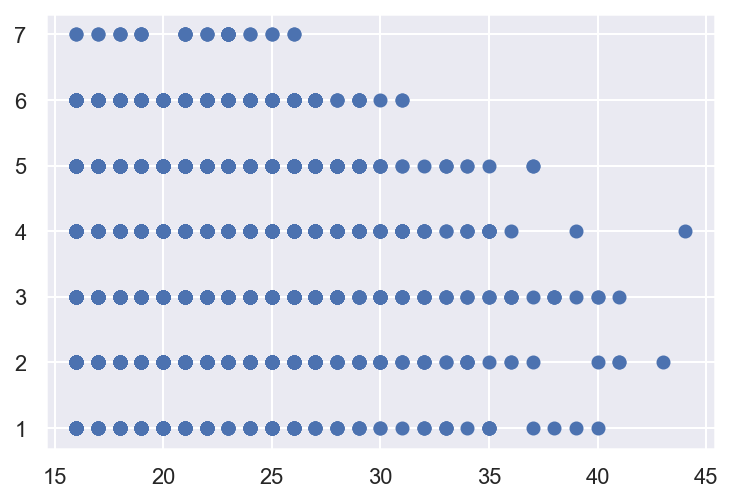

In [37]:
# Plot league ranking vs Age
plt.scatter(scc_nonull.Age, scc_nonull.LeagueIndex)

- There does seem to be a relationship between age and league ranking.
- Let's look at the mean and median age per LeagueIndex.

In [38]:
# Mean age per LeagueIndex
nonull_mean_age = scc_nonull.groupby(['LeagueIndex']).Age.mean()
nonull_mean_age

LeagueIndex
1    22.724551
2    22.155620
3    22.071038
4    21.990099
5    21.365239
6    20.674304
7    21.294118
Name: Age, dtype: float64

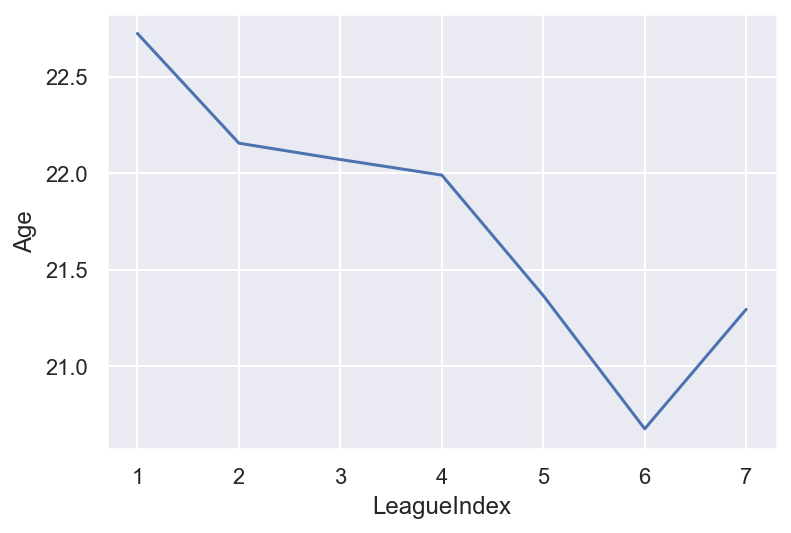

In [39]:
sns.lineplot(x=nonull_mean_age.index, y=nonull_mean_age)

- So in general higher league players tend to be younger.
- Let's look at box and violin plots to see another visualization.

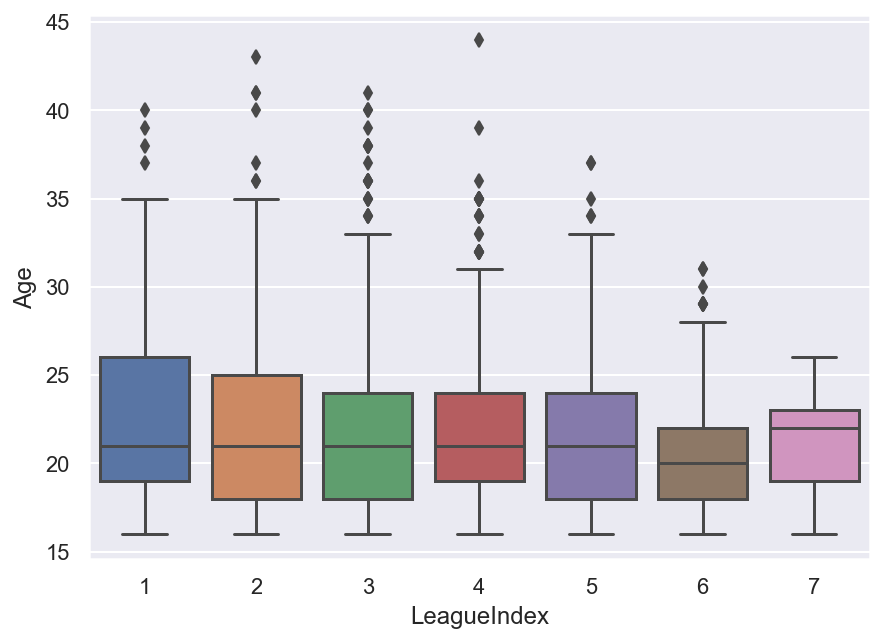

In [40]:
# Boxplot
fig, ax = pyplot.subplots(figsize=(7,5))
sns.boxplot(ax=ax, x="LeagueIndex", y="Age", data=scc_nonull)

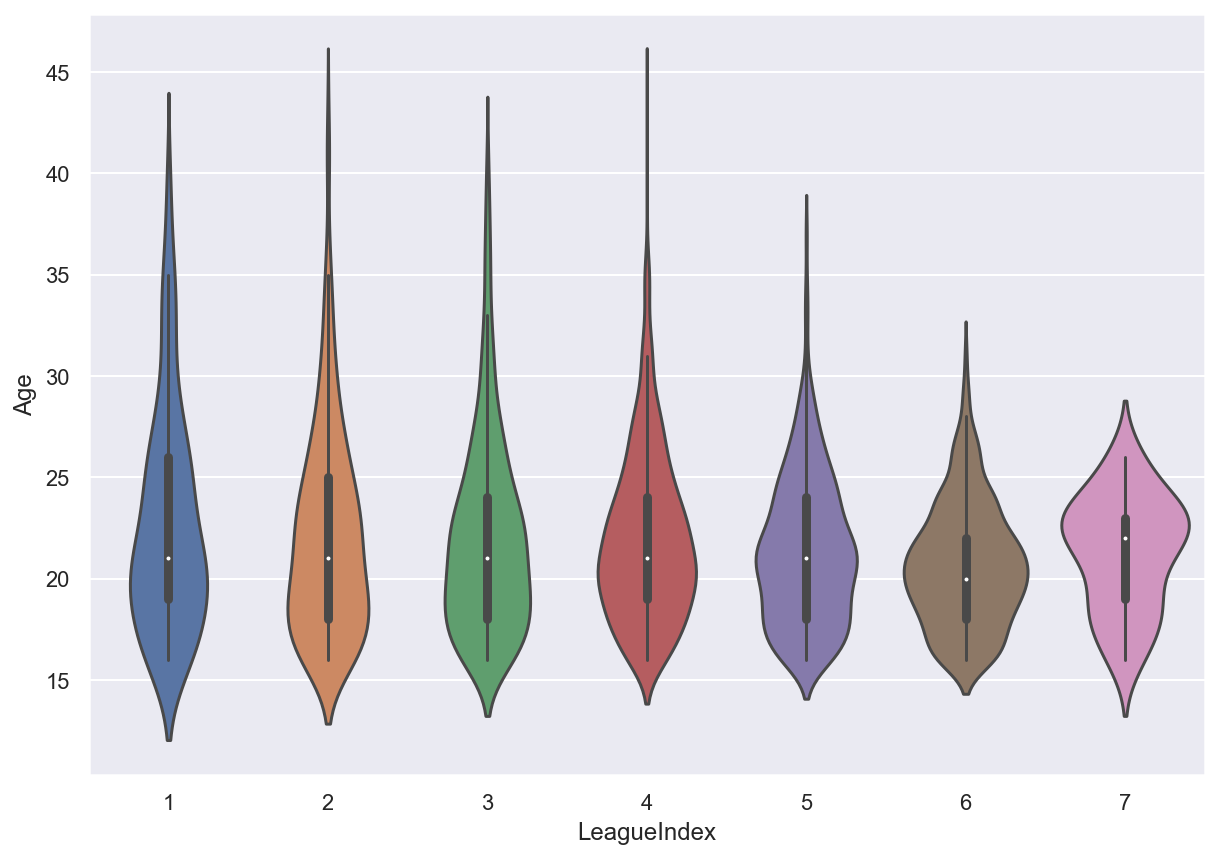

In [41]:
# Boxplot
fig, ax = pyplot.subplots(figsize=(10,7))
sns.violinplot(ax=ax, x="LeagueIndex", y="Age", data=scc_nonull)

- The mean for age are pretty close across the board.
- In general the mean age goes down as the league goes up, but there is only a 2 year difference between the top and low means.
- For some outside reference here are a couple of useful links for player age:
    - Players' age in GSL: https://www.reddit.com/r/starcraft/comments/9erxwm/players_age_in_gsl/
    - https://imgur.com/a/FhHayNP
    - Note the age at the time of the survey in 2013. This is consistent with what we see in the data. 
    - Over time it seems these ages have gone, up as you might expect with an older game.
- However, if the means are so close across the board __age probably doesn't matter much__ and we can __just eliminate it as a feature__.
    - Let's try to confirm if this is the case. 

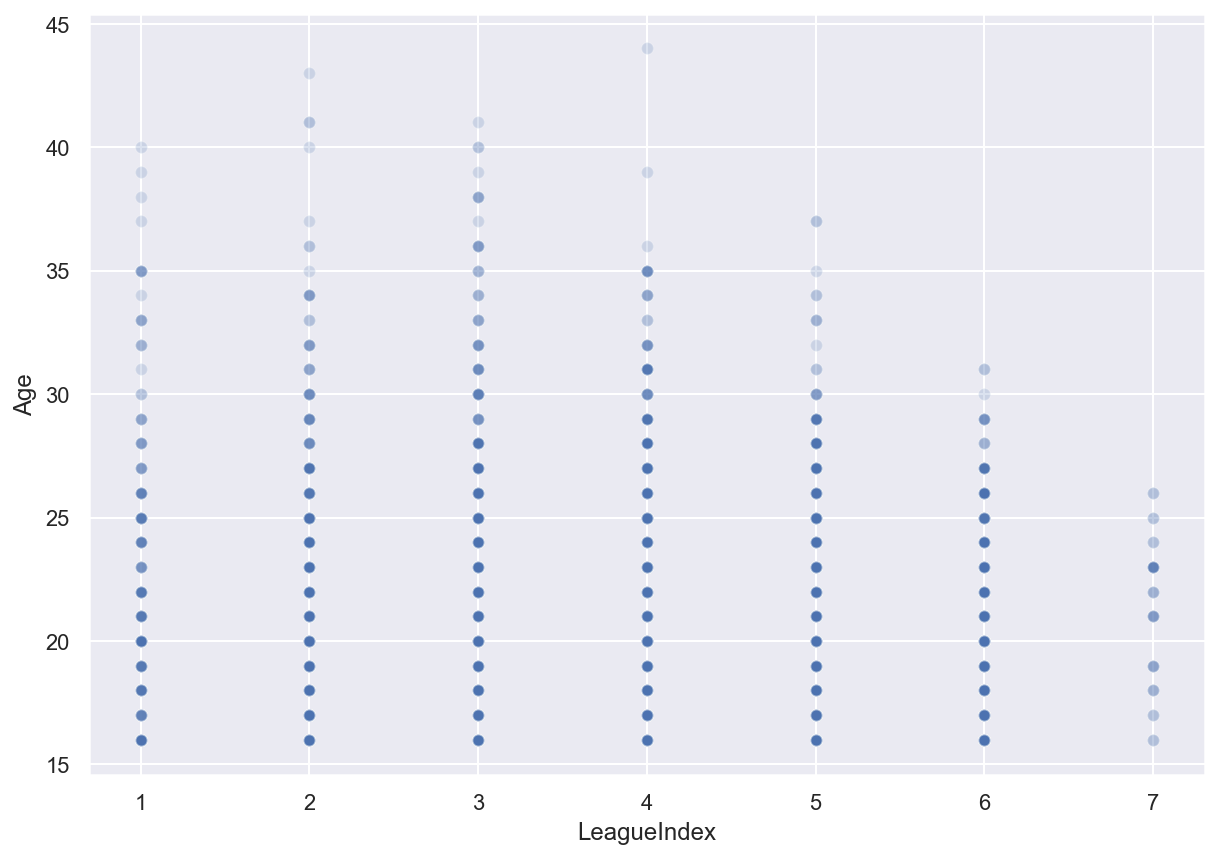

In [42]:
fig, ax = pyplot.subplots(figsize=(10,7))
sns.scatterplot(x='LeagueIndex', y='Age', data=scc_nonull, alpha=0.2)

- Across many of these plots their trend indicates that there is a light correlation between Age and LeagueIndex, with lower age corresponding to higher leagues. Let's look at the numerical covariance to confirm.

In [43]:
scc_nonull.LeagueIndex.corr(scc_nonull.Age).round(4)

-0.1276

- So we have a __slight negative correlation between age and league__. This is interesting and somewhat useful data, giving value to Age as a variable.

## NaN Conclusion - Remove Age, TotalHours, HoursPerWeek
- This is tough, as I believe there is value in this data, but __because we don't have *any* examples of these variables for the Pro category__, I can't feasibly use established methods such as taking the mean, a random sample of the Pro league distribution, or a regression of the samples to infer what the Pro values for those variables might be. 
- Because I want to keep the top tier players in the mix I'm going to __remove the features of Age, TotalHours and HoursPerWeek from the dataset.__

### Remove Age, TotalHours, HoursPerWeek Variables from dataset

In [44]:
# Reset Index
scc_fn = scc.reset_index(drop=True)

In [48]:
# Remove Age, TotalHours, HoursPerWeek
scc_fn.drop(labels=['Age', 'HoursPerWeek', 'TotalHours'], axis=1, inplace=True)

## Cleaned Dataframe Created - `scn_fn`
- df is called scn_fn
- Duplicate players removed
- Variables with no data in Pro category removed: Age, HoursPerWeek, TotalHours

In [52]:
scc_fn.head()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,5,143.7180,0.003515,0.000220,0.000055,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,4,69.9612,0.001101,0.000336,0.000042,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
2,3,107.6016,0.001034,0.000213,0.000011,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
3,3,122.8908,0.001136,0.000327,0.000039,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936
4,2,44.4570,0.000978,0.000255,0.000021,0.000000,0.000000,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.0,0.000000,94032


In [50]:
# Breakdown of leagues
scc_fn['LeagueIndex'].value_counts().sort_index()

1    167
2    347
3    549
4    808
5    796
6    611
7     34
8     55
Name: LeagueIndex, dtype: int64

## Pickle Cleaned DataFrames

In [51]:
# Pickle unscaled data frame
import pickle

with open('./pickles/sc_dataclean.pickle', 'wb') as to_write:
    pickle.dump(scc_fn, to_write)

---